# Data Mining Versuch Document Classification
* Autor: Prof. Dr. Johannes Maucher
* Datum: 06.11.2015

[Übersicht Versuche im Data Mining Praktikum](http://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)

## Abgabe:

- **Abzugeben ist das Jupyter Notebook mit dem verlangten Implementierungen und den entsprechenden Ausgaben.**
- **Das Notebook ist als .ipynb und als .html abzugeben.**
- **Klausurelevante Fragen sind Dokument "Fragenkatalog Datamining" zu finden.**
- Antworten auf Fragen im Notebook, Diskussionen und Beschreibung der Ergebnisse sind optional (aber empfohlen) und werden nicht bewertet.

* [Übersicht Data Mining Praktikum](https://maucher.pages.mi.hdm-stuttgart.de/ai/page/dm/)


# Einführung

## Lernziele:

In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Dokumentklassifikation: Klassifikation von Dokumenten, insbesondere Emails und RSS Feed
* Naive Bayes Classifier: Weit verbreitete Klassifikationsmethode, welche unter bestimmten Randbedingungen sehr gut skaliert.


## Theorie zur Vorbereitung

### Parametrische Klassifikation und Naive Bayes Methode

Klassifikatoren müssen zu einer gegebenen Eingabe $\underline{x}$ die zugehörige Klasse $C_i$ bestimmen. Mithilfe der Wahrscheinlichkeitstheorie kann diese Aufgabe wie folgt beschrieben werden: Bestimme für alle möglichen Klassen $C_i$ die bedingte Wahrscheinlichkeit $P(C_i | \underline{x})$, also die Wahrscheinlichkeit, dass die gegebene Eingabe $\underline{x}$ in Klasse $C_i$ fällt. Wähle dann die Klasse aus, für welche diese Wahrscheinlichkeit maximal ist.

Die Entscheidungsregeln von Klassifikatoren können mit Methoden des "überwachten Lernens" aus Trainingsdaten ermittelt werden. Im Fall des **parametrischen Lernens** kann aus den Trainingsdaten die sogenannte **Likelihood-Funktion** $p(\underline{x} \mid C_i)$ bestimmt werden. _Anmerkung:_ Allgemein werden mit $p(...)$ kontinuierliche Wahrscheinlichkeitsfunktionen und mit $P(...)$ diskrete Wahrscheinlichkeitswerte bezeichnet. 

Mithilfe der **Bayes-Formel**
$$
P(C_i \mid \underline{x}) = \frac{p(\underline{x} \mid C_i) \cdot P(C_i)}{p(\underline{x})}
$$

kann aus der Likelihood die **a-posteriori-Wahrscheinlichkeit $P(C_i \mid \underline{x})$** berechnet werden. Darin wird $P(C_i)$ die **a-priori-Wahrscheinlichkeit** und $p(\underline{x})$ die **Evidenz** genannt. Die a-priori-Wahrscheinlichkeit kann ebenfalls aus den Trainingsdaten ermittelt werden. Die Evidenz ist für die Klassifikationsentscheidung nicht relevant, da sie für alle Klassen $C_i$ gleich groß ist.

Die Berechnung der Likelihood-Funktion $p(\underline{x} \mid C_i)$ ist dann sehr aufwendig, wenn $\underline{x}=(x_1,x_2,\ldots,x_Z)$ ein Vektor von voneinander abhängigen Variablen $x_i$ ist. Bei der **Naive Bayes Classification** wird jedoch von der vereinfachenden Annahme ausgegangen, dass die Eingabevariabeln $x_i$ voneinander unabhängig sind. Dann vereinfacht sich die bedingte Verbundwahrscheinlichkeits-Funktion $p(x_1,x_2,\ldots,x_Z \mid C_i)$ zu:

$$
p(x_1,x_2,\ldots,x_Z \mid C_i)=\prod\limits_{j=1}^Z p(x_j | C_i)
$$

### Anwendung der Naive Bayes Methode in der Dokumentklassifikation

Auf der rechten Seite der vorigen Gleichung stehen nur noch von den jeweils anderen Variablen unabhängige bedingte Wahrscheinlichkeiten. Im Fall der Dokumentklassifikation sind die einzelnen Worte die Variablen, d.h. ein Ausdruck der Form $P(x_j | C_i)$ gibt an mit welcher Wahrscheinlichkeit ein Wort $x_j=w$ in einem Dokument der Klasse $C_i$ vorkommt. 
Die Menge aller Variablen $\left\{x_1,x_2,\ldots,x_Z \right\}$ ist dann die Menge aller Wörter im Dokument. Damit gibt die linke Seite in der oben gegebenen Gleichung die *Wahrscheinlichkeit, dass die Wörter $\left\{x_1,x_2,\ldots,x_Z \right\}$ in einem Dokument der Klasse $C_i$ vorkommen*, an.

Für jedes Wort _w_ wird aus den Trainingsdaten die Wahrscheinlichkeit $P(w|G)$, mit der das Wort in Dokumenten der Kategorie _Good_ und die Wahrscheinlichkeit $P(w|B)$ mit der das Wort in Dokumenten der Kategorie _Bad_ auftaucht ermittelt. Trainingsdokumente werden in der Form

$$
tD=(String,Category)
$$
eingegeben. 

Wenn 

* mit der Variable $fc(w,cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ in denen das Wort $w$ enthalten ist
* mit der Variable $cc(cat)$ die Anzahl der Trainingsdokumente in Kategorie $cat$ 

gezählt wird, dann ist 

$$
P(w|G)=\frac{fc(w,G)}{cc(G)} \quad \quad P(w|B)=\frac{fc(w,B)}{cc(B)}
$$

Wird nun nach der Eingabe von $L$ Trainingsdokumenten ein neu zu klassifizierendes Dokument $D$ eingegeben und sei $W(D)$ die Menge aller Wörter in $D$, dann berechnen sich unter der Annahme, dass die Worte in $W(D)$ voneinander unabhängig sind (naive Bayes Annahme) die a-posteriori Wahrscheinlichkeiten zu:

$$
P(G|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | G) \right) \cdot P(G)}{p(D)}
$$
und
$$
P(B|D)=\frac{\left( \prod\limits_{w \in W(D)} P(w | B) \right) \cdot P(B)}{p(D)}
$$

Die hierfür notwendigen a-priori-Wahrscheinlichkeiten berechnen sich zu 

$$
P(G)=\frac{cc(G)}{L}
$$
und
$$
P(B)=\frac{cc(B)}{L}
$$

Die Evidenz $p(D)$ beeinflusst die Entscheidung nicht und kann deshalb ignoriert werden.


## Vor dem Versuch zu klärende Fragen


1. Wie wird ein Naive Bayes Classifier trainiert? Was muss beim Training für die spätere Klassifikation abgespeichert werden?

Der Naive-Bayes Classifier wird überwacht trainiert. Dabei wird ein Classifier mit den Wahrscheinlichkeiten trainiert das ein Wort w in einem Dokument der Klasse C_i vorkommt.

Die Variablen cc und fc müssen abgespeichert werden:
* cc(cat): Anzahl der Trainingsdokumente der Kategorie cat
* fc(w,cat): Anzahl der Trainingsdokumente der Kategorie cat in denen das Wort w vorkommt

2. Wie teilt ein Naiver Bayes Classifier ein neues Dokument ein?

Mit Hilfe der posteriori Wahrscheinlichkeit.

Diese wird mit der Likelihood-Funktion, Evidenz und der a-priori Wahrscheinlichkeiten berechnet. 
* Likelihood-Funktion: Produkt der Wahrscheinlichkeiten dass die einzelnen Wörter aus dem Dokument in der Kategorie C_i sind.
* a-priori Wahrscheinlichkeiten: Wahrscheinlichkeit der Kategorie C_i.

3. Welche naive Annahme liegt dem Bayes Classifier zugrunde? Ist diese Annahme im Fall der Dokumentklassifikation tatsächlich gegeben?

Annahme: Alle Eingabevektoren sind unabhängig voneinander.

Nein, da Wörter in Dokumenten voneinander abhängig sind (Semantik).

4. Betrachten Sie die Formeln für die Berechnung von $P(G|D)$ und $P(B|D)$. Welches Problem stellt sich ein, wenn in der Menge $W(D)$ ein Wort vorkommt, das nicht in den Trainingsdaten der Kategorie $G$ vorkommt und ein anderes Wort aus $W(D)$ nicht in den Trainingsdaten der Kategorie $B$ enthalten ist? Wie könnte dieses Problem gelöst werden? 

P(w|G) bzw. P(w|B) sind 0 wenn w nich in G oder B ist, somit würde auch das Produkt in P(G|D) bzw. P(B|D) gleich 0 sein. Dadurch sind dann auch P(G|D) bzw. P(B|D) gleich 0 wodurch D mit einer Wahrscheinlichkeit von 0 in B bzw. G ist. Das Problem könnte gelöst werden wenn man eine Standard wert einführt (zb. 0.1), damit nicht durch ein einzelens Wort in einem Dokument D, das nicht in den Trainingsdaten ist, ein Dokument nicht zugewiesen werden kann.

# Durchführung
## Feature Extraction/ -Selection

**Aufgabe:**
Implementieren Sie eine Funktion *getwords(doc)*, der ein beliebiges Dokument in Form einer String-Variablen übergeben wird. In der Funktion soll der String in seine Wörter zerlegt und jedes Wort in _lowercase_ transformiert werden. Wörter, die weniger als eine untere Grenze von Zeichen (z.B. 3) oder mehr als eine obere Grenze von Zeichen (z.B. 20) enthalten, sollen ignoriert werden. Die Funktion soll ein dictionary zurückgeben, dessen _Keys_ die Wörter sind. Die _Values_ sollen für jedes Wort zunächst auf $1$ gesetzt werden.

**Tipp:** Benutzen Sie für die Zerlegung des Strings und für die Darstellung aller Wörter mit ausschließlich kleinen Buchstaben die Funktionen *split(), strip('sep')* und *lower()* der Klasse *String*.  


In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import feedparser
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
def getwords(doc):
    word_list = doc.split()
    word_dict = {}
    list_iligel_symbols = ["'",'!','?','.',',',';',':','-','_','*','+','~','#','=','}','[',']','{','(',')','/','$','€',"\\",'@','"','%','&','“','‘', '@','’']
    for value in word_list:
        value_str = value.lower()
        for sym in list_iligel_symbols:
            value_str = value_str.replace(sym, '')
                     
        if(len(value_str)>=3 and len(value_str)<=20):
            if(value_str in word_dict.keys()):
                word_dict[value_str] = 1
            else:
                word_dict[value_str] = 1
    return word_dict

In [3]:
# modifizierte Version der Methode für die Aufgabe Klassifikation von RSS-Newsfeed
def getwordsmodified(doc):
    word_list = doc.split()
    word_dict = {}
    list_iligel_symbols = ["'",'!','?','.',',',';',':','-','_','*','+','~','#','=','}','[',']','{','(',')','/','$','€',"\\",'@','"','%','&','“','‘', '@','’']
    for value in word_list:
        value_str = value.lower()
        for sym in list_iligel_symbols:
            value_str = value_str.replace(sym, '')
                     
        if(len(value_str)>=3 and len(value_str)<=20):
            if(value_str in word_dict.keys()):
                word_dict[value_str] += 1
            else:
                word_dict[value_str] = 1
    return word_dict

## Classifier

**Aufgabe:**
Implementieren Sie den Naive Bayes Classifier für die Dokumentklassifikation. Es bietet sich an die Funktionalität des Klassifikators und das vom Klassifikator gelernte Wissen in einer Instanz einer Klasse _Classifier_ zu kapseln. In diesem Fall kann wie folgt vorgegangen werden:

* Im Konstruktor der Klasse wird je ein Dictionary für die Instanzvariablen _fc_ und _cc_ (siehe oben) initialisiert. Dabei ist _fc_ ein verschachteltes Dictionary. Seine Keys sind die bisher gelernten Worte, die Values sind wiederum Dictionaries, deren Keys die Kategorien _Good_ und _Bad_ sind und deren Values zählen wie häufig das Wort bisher in Dokumenten der jeweiligen Kategorie auftrat. Das Dictionary _cc_ hat als Keys die Kategorien _Good_ und _Bad_. Die Values zählen wie häufig Dokumente der jeweiligen Kategorien bisher auftraten.
* Im Konstruktor wird ferner der Instanzvariablen _getfeatures_ die Funktion *getwords()* übergeben. Die Funktion _getwords()_ wurde bereits zuvor ausserhalb der Klasse definiert. Sinn dieses Vorgehens ist, dass andere Varianten um Merkmale aus Dokumenten zu extrahieren denkbar sind. Diese Varianten könnten dann ähnlich wie die *getwords()*-Funktion ausserhalb der Klasse definiert und beim Anlegen eines *Classifier*-Objekts der Instanzvariablen _getfeatures_ übergeben werden.  
* Der Methode _incf(self,f,cat)_ wird ein Wort _f_ und die zugehörige Kategorie _cat_ des Dokuments in welchem es auftrat übergeben. In der Methode wird der *fc*-Zähler angepasst.
* Der Methode _incc(self,cat)_ wird die Kategorie _cat_ des gerade eingelesenen Dokuments übergeben. In der Methode wird der *cc*-Zähler angepasst.
* Die Methode _fcount(self,f,cat)_ gibt die Häufigkeit des Worts _f_ in den Dokumenten der Kategorie _cat_ zurück.
* Die Methode _catcount(self,cat)_ gibt die Anzahl der Dokumente in der Kategorie _cat_ zurück.
* Die Methode _totalcount(self)_ gibt die Anzahl aller Dokumente zurück.
* Der Methode _train(self,item,cat)_ wird ein neues Trainingselement, bestehend aus der Betreffzeile (*item*) und der entsprechenden Kategorisierung (*cat*) übergeben. Der String _item_ wird mit der Instanzmethode _getfeatures_ (Diese referenziert *getwords()*) in Worte zerlegt. Für jedes einzelne Wort wird dann *incf(self,f,cat)* aufgerufen. Ausserdem wird für das neue Trainingsdokument die Methode _incc(self,cat)_ aufgerufen.
* Die Methode _fprob(self,f,cat)_ berechnet die bedingte Wahrscheinlichkeit $P(f | cat)$ des Wortes _f_ in der Kategorie _cat_ entsprechend der oben angegebenen Formeln, indem sie den aktuellen Stand des Zählers _fc(f,cat)_ durch den aktuellen Stand des Zählers _cc(cat)_ teilt.   
* Die Methode _fprob(self,f,cat)_ liefert evtl. ungewollt extreme Ergebnisse, wenn noch wenig Wörter im Klassifizierer verbucht sind. Kommt z.B. ein Wort erst einmal in den Trainingsdaten vor, so wird seine Auftrittswahrscheinlichkeit in der Kategorie in welcher es nicht vorkommt gleich 0 sein. Um extreme Wahrscheinlichkeitswerte im Fall noch selten vorkommender Werte zu vermeiden, soll zusätzlich zur Methode _fprob(self,f,cat)_ die Methode _weightedprob(self,f,cat)_ implementiert und angewandt werden. Der von ihr zurückgegebene Wahrscheinlichkeitswert könnte z.B. wie folgt berechnet werden:$$wprob=\frac{initprob+count \cdot fprob(self,f,cat)}{1+count},$$ wobei $initprob$ ein initialer Wahrscheinlichkeitswert (z.B. 0.5) ist, welcher zurückgegeben werden soll, wenn das Wort noch nicht in den Trainingsdaten aufgetaucht ist. Die Variable $count$ zählt wie oft das Wort $f$ bisher in den Trainingsdaten auftrat. Wie zu erkennen ist, nimmt der Einfluss der initialen Wahrscheinlichkeit ab, je häufiger das Wort in den Trainingsdaten auftrat.
* Nach dem Training soll ein beliebiges neues Dokument (Text-String) eingegeben werden können. Für dieses soll mit der Methode _prob(self,item,cat)_ die a-posteriori-Wahrscheinlichkeit $P(cat|item)$ (Aufgrund der Vernachlässigung der Evidenz handelt es sich hierbei genaugenommen um das Produkt aus a-posteriori-Wahrscheinlichkeit und Evidenz), mit der das Dokument _item_ in die Kategorie _cat_ fällt berechnet werden. Innerhalb der Methode _prob(self,item,cat)_ soll zunächst die Methode _weightedprob(self,f,cat)_ für alle Wörter $f$ im Dokument _item_ aufgerufen werden. Die jeweiligen Rückgabewerte von _weightedprob(self,f,cat)_ werden multipliziert. Das Produkt der Rückgabewerte von _weightedprob(self,f,cat)_ über alle Wörter $f$ im Dokument muss schließlich noch mit der a-priori Wahrscheinlichkeit $P(G)$ bzw. $P(B)$ entsprechend der oben aufgeführten Formeln multipliziert werden. Das Resultat des Produkts wird an das aufrufende Programm zurück gegeben, die Evidenz wird also vernachlässigt (wie oben begründet).



Ein Dokument _item_ wird schließlich der Kategorie _cat_ zugeteilt, für welche die Funktion _prob(self,item,cat)_ den höheren Wert zurück gibt. Da die Rückgabewerte in der Regel sehr klein sind, werden in der Regel folgende Werte angezeigt:
* Wenn mit $g$ der Rückgabewert von _prob(self,item,cat=G)_ und mit $b$ der Rückgabewert von _prob(self,item,cat=B)_ bezeichnet wird dann ist die Wahrscheinlichkeit, dass $item$ in die Kategorie $G$ fällt, gleich:
$$
\frac{g}{g+b}
$$
* und die Wahrscheinlichkeit, dass $item$ in die Kategorie $B$ fällt, gleich:
$$
\frac{b}{g+b}
$$

In [4]:
class Classifier:
    categories = []
    
    def __init__(self, getfeatures, categories):
        self.categories = categories
        self.cc = {}
        for category in self.categories:
            self.cc[category] = 0
        self.fc = {}
        self.getfeatures = getfeatures
    
    def incf(self, cat, w, count):
        if w in self.fc.keys():
            if cat in self.fc[w].keys():
                self.fc[w][cat] += count 
            else:
                self.fc[w][cat] = count 
        elif w not in self.fc.keys():
            self.fc[w] = {}
            for category in self.categories:
                self.fc[w][category] = 0

            self.fc[w][cat] += count       

    def incc(self, cat):
        self.cc[cat] += 1

    def fcount(self, cat, w):
        if w in self.fc.keys():
            x = self.fc[w][cat]
        else:
            x = 0
        return x
        
    def catcount(self, cat):
        return self.cc[cat]

    def totalcount(self):
        return sum(self.cc.values())

    def train(self, item, cat):
        word_dict = self.getfeatures(item)
        for key in word_dict.keys():
            self.incf(cat, key, word_dict[key])
        self.incc(cat)
    
    def fprob(self, cat, w):
        x = self.fcount(cat, w)/self.catcount(cat)
        return x

    def weightedprob(self, cat, w):
        fProb = self.fprob(cat, w)
        initProb = 0.5
        count = 0
        for value in self.categories:
            count += self.fcount(value, w)
        
        x = (initProb + count*fProb)/ (1+count)
        return x
    
    def prob(self, item, cat):
        word_dict = self.getfeatures(item) 
        prodProb = 1
        for value in word_dict:
            prodProb *= self.weightedprob(cat, value)
        catCount = self.catcount(cat)
        totCount = self.totalcount()
        apriori = catCount/totCount
        x = prodProb*apriori
        return x

    def decision(self,item):
        g = self.prob(item, self.categories[0])
        b = self.prob(item, self.categories[1])
        good = g/(g+b)
        bad = b/(g+b)
        result = ''
        if b < g:
            print(f"der Text gehört mit einer Wahrscheinlichkeit von {good} zu der Kategorie '{self.categories[0]}'")
            result = self.categories[0]
        else:
            print(f"der Text gehört mit einer Wahrscheinlichkeit von {bad} zu der Kategorie '{self.categories[1]}'")
            result = self.categories[1]
        return result

## Test

**Aufgabe:**
Instanzieren Sie ein Objekt der Klasse _Classifier_ und übergeben Sie der _train()_ Methode dieser Klasse mindestens 8 kategorisierte Dokumente (Betreffzeilen als Stringvariablen zusammen mit der Kategorie Good oder Bad). Definieren Sie dann ein beliebig neues Dokument und berechnen Sie für dieses die Kategorie, in welches es mit größter Wahrscheinlichkeit fällt. Benutzen Sie für den Test das in der
[NLP Vorlesung Document Classification](https://griesshaber.pages.mi.hdm-stuttgart.de/nlp/06classification/07classificationNaiveBayes.html)
ausführlich beschriebene Beispiel zu implementieren. Berechnen Sie die Klassifikatorausgabe des Satzes _the money jumps_.

In [5]:
data = pd.read_csv('./Data/train.csv',index_col=0)

data = data[data['text'].notna()]

cats = []
for value in data["label"]:
    if(value == 0):
        cats.append("Good")
    else:
        cats.append("Bad")

data["category"] = cats

In [6]:
test_data = data.head(10000)
category = ["Good", "Bad"]
classifier = Classifier(getwords, category)
classifier_mod = Classifier(getwordsmodified, category)

texts = []
cats = []
for value in test_data["text"]:
    texts.append(value)

for value in test_data["category"]:
    cats.append(value)

for i in range(0,50):
    classifier.train(texts[i], cats[i])

for i in range(0,50):
    classifier_mod.train(texts[i], cats[i])


In [7]:
test_string = "The money jumps."

classifier.decision(test_string)
classifier_mod.decision(test_string)

der Text gehört mit einer Wahrscheinlichkeit von 0.7091537106296171 zu der Kategorie 'Good'
der Text gehört mit einer Wahrscheinlichkeit von 0.6736648675294423 zu der Kategorie 'Good'


'Good'

## Klassifikation von RSS Newsfeeds
Mit dem unten gegebenen Skript werden Nachrichten verschiedener Newsserver geladen und ausgegeben. Ändern Sie diese Methode ab, damit diese Strings gespeichert werden und für ein Training benutzt werden können. 


In [8]:
def countFeed(feedList, title, should_print=False):
    if should_print:
        print(f"--------------------News from {title}------------------------")
    count = 0
    for feed in feedList:
        if should_print:
            print()
            print("*"*30)
            print(feed)
        f=feedparser.parse(feed)
        for e in f.entries:
            if hasattr(e, 'title') and hasattr(e, 'description'):
                if should_print:
                    print('\n---------------------------')
                fulltext=stripHTML(e.title+' '+e.description)
                if should_print:
                    print(fulltext)
                count += 1
    if should_print:
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
        print("----------------------------------------------------------------")
    return count

# Unsere Funktion zum Abspeichern der Strings
def getTextFeed(feedList, title, cat):
    text = {}
    for feed in feedList:
        if(feed == 'http://rss.golem.de/rss.php?r=sw&feed=RSS0.91'):
            cat = 'Tech'
        elif(feed == 'http://www.welt.de/?service=Rss' or feed == 'http://newsfeed.zeit.de/politik/index'):
            cat = 'NonTech'
        f=feedparser.parse(feed)
        for e in f.entries:
            if hasattr(e, 'title') and hasattr(e, 'description'):
                fulltext=stripHTML(e.title+' '+e.description)
                text[fulltext] = cat
    return text
                
def stripHTML(h):
    p=''
    s=0
    for c in h:
        if c=='<': 
            s=1
        elif c=='>':
            s=0
            p+=' '
        elif s==0:
            p+=c
    return p

trainTech=['http://rss.chip.de/c/573/f/7439/index.rss',
           #'http://feeds.feedburner.com/netzwelt',
           'http://rss1.t-online.de/c/11/53/06/84/11530684.xml',
           'http://www.computerbild.de/rssfeed_2261.xml?node=13',
           'http://www.heise.de/newsticker/heise-top-atom.xml']

trainNonTech=['http://newsfeed.zeit.de/index',
              'http://newsfeed.zeit.de/wirtschaft/index',
              'http://www.welt.de/politik/?service=Rss',
              'http://www.spiegel.de/schlagzeilen/tops/index.rss',
              'https://rss.sueddeutsche.de/alles',
              'http://www.faz.net/rss/aktuell/']

test=['http://rss.golem.de/rss.php?r=sw&feed=RSS0.91',
      'http://newsfeed.zeit.de/politik/index',  
      'http://www.welt.de/?service=Rss']

countnews={}
countnews['tech']=countFeed(trainTech, 'trainTech')
countnews['nontech']=countFeed(trainNonTech, 'trainNonTech')
countnews['test']=countFeed(test, 'test')

print('Number of used trainings samples in categorie tech',countnews['tech'])
print('Number of used trainings samples in categorie notech',countnews['nontech'])
print('Number of used test samples',countnews['test'])
print('--'*30)

news_text={}
news_text['tech'] = {}
news_text['nontech'] = {}
news_text['test'] = {}
news_text['tech'] = getTextFeed(trainTech, 'trainTech', 'Tech')
news_text['nontech'] = getTextFeed(trainNonTech, 'trainNonTech', 'NonTech')
news_text['test'] = getTextFeed(test, 'test','')


Number of used trainings samples in categorie tech 160
Number of used trainings samples in categorie notech 115
Number of used test samples 85
------------------------------------------------------------


**Aufgaben:**
1. Trainieren Sie Ihren Naive Bayes Classifier mit allen Nachrichten der in den Listen _trainTech_ und _trainNonTech_ definierten Servern. Weisen Sie für das Training allen Nachrichten aus _trainTech_ die Kategorie _Tech_ und allen Nachrichten aus _trainNonTech_ die Kategorie _NonTech_ zu.

In [9]:
categories = ["Tech", "NonTech"]

classifier_rss = Classifier(getwords, categories)
classifier_rss_mod = Classifier(getwordsmodified, categories)

tech_texts = []

tech_texts = news_text['tech'].keys()
nontech_texts = news_text['nontech'].keys()
test_texts = news_text['test'].keys()

for text in tech_texts:
    classifier_rss.train(text, "Tech")
for text in nontech_texts:
    classifier_rss.train(text, "NonTech")

for text in tech_texts:
    classifier_rss_mod.train(text, "Tech")
for text in nontech_texts:
    classifier_rss_mod.train(text, "NonTech")

2. Nach dem Training sollen alle Nachrichten aus der Liste _test_ vom Naive Bayes Classifier automatisch klassifiziert werden. Gehen Sie davon aus, dass alle Nachrichten von [http://rss.golem.de/rss.php?r=sw&feed=RSS0.91](http://rss.golem.de/rss.php?r=sw&feed=RSS0.91) tatsächlich von der Kategorie _Tech_ sind und alle Nachrichten von den beiden anderen Servern in der Liste _test_ von der Kategorie _NonTech_ sind. Bestimmen Sie die _Konfusionsmatrix_ und die _Accuracy_ sowie für beide Klassen _Precision, Recall_ und _F1-Score_. Diese Qualitätsmetriken sind z.B. in [NLP Vorlesung Document Classification](https://griesshaber.pages.mi.hdm-stuttgart.de/nlp/06classification/06classificationMetrics.html) definiert.

In [10]:
pred_cat = []
test_true = []
pred_cat_mod = []
test_true_mod = []

for text in test_texts:
    test_true.append(news_text['test'][text])
    pred_cat.append(classifier_rss.decision(text))
    
for text in test_texts:
    test_true_mod.append(news_text['test'][text])
    pred_cat_mod.append(classifier_rss_mod.decision(text))

der Text gehört mit einer Wahrscheinlichkeit von 0.8703032338847528 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.7922977248907801 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.6702777705635751 zu der Kategorie 'NonTech'
der Text gehört mit einer Wahrscheinlichkeit von 0.5231735863122527 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.5435865472216501 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.7400695937579748 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.7031518074023397 zu der Kategorie 'NonTech'
der Text gehört mit einer Wahrscheinlichkeit von 0.6624622607001405 zu der Kategorie 'NonTech'
der Text gehört mit einer Wahrscheinlichkeit von 0.9172658733382544 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.5955022835901272 zu der Kategorie 'Tech'
der Text gehört mit einer Wahrscheinlichkeit von 0.751299922690387 zu d

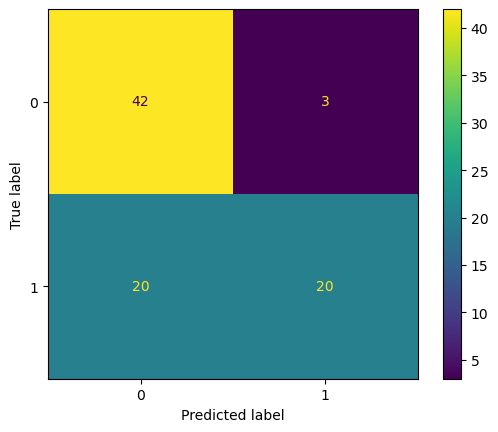

In [11]:
cm = confusion_matrix(test_true, pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()
# TP | FN
#--------
# FP | TN

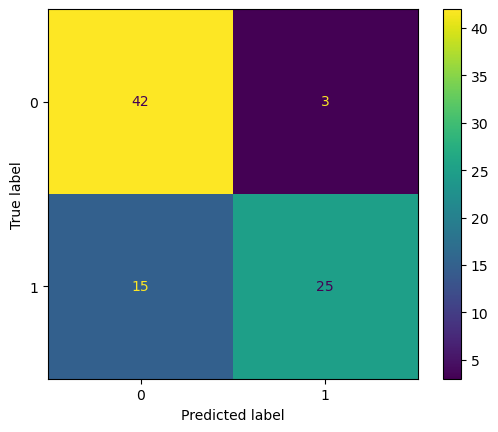

In [12]:
cm_mod = confusion_matrix(test_true_mod, pred_cat_mod)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mod)

disp.plot()

plt.show()

In [13]:
# Bestimmen Sie die Konfusionsmatrix und die Accuracy sowie für beide Klassen Precision, Recall und F1-Score. 
# Accuracy
# True Tech + True NonTech / alles
acc = (cm[0][0] + cm[1][1])/sum(sum(cm))

# Tech
    # Precision: True Tech / (True Tech + False Tech)
prec_tech = cm[0][0] / (cm[0][0] + cm[1][0])
    # Recall: True Tech / (True Tech + Flase NonTech)
recall_tech = cm[0][0] / (cm[0][0] + cm[0][1])
    # F1-Score: 2* Precision * Recall / (Precision + Recall)
f1_tech = 2*((prec_tech*recall_tech)/(prec_tech + recall_tech))

# NonTech
    # Precision: True NonTech / (True NonTech + False NonTech)
prec_nonTech = cm[1][1] / (cm[1][1] + cm[0][1])
    # Recall: True NonTech / (True NonTech + False Tech)
recall_nonTech = cm[1][1] / (cm[1][1] + cm[1][0])
    # F1-Score: 2* Precision * Recall / (Precision + Recall)
f1_nonTech = 2*((prec_nonTech*recall_nonTech)/(prec_nonTech + recall_nonTech))

In [14]:
print(f"Accuracy: {acc}")
print("--------Tech---------")
print(f"Precision: {prec_tech}")
print(f"Recall: {recall_tech}")
print(f"F1-Score: {f1_tech}")
print("-------NonTech-------")
print(f"Precision: {prec_nonTech}")
print(f"Recall: {recall_nonTech}")
print(f"F1-Score: {f1_nonTech}")

Accuracy: 0.7294117647058823
--------Tech---------
Precision: 0.6774193548387096
Recall: 0.9333333333333333
F1-Score: 0.7850467289719625
-------NonTech-------
Precision: 0.8695652173913043
Recall: 0.5
F1-Score: 0.634920634920635


3. Diskutieren Sie das Ergebnis.

* Trotz der Vernachlässigung der Semantik im Dokument ergibt sich eine Accuracy von 71,76%
* Die Precision ist für nonTech Artikel besser als für Tech, der Classifier ist bei non Tech Artikel zuverlässiger
* Der Recall für Tech ist besser als für nonTech, Tech Artikel werden öfter erkannt als nonTech Artikel
* Der F1-Score ist bei Kategorie Tech höher als bei nonTech. Der Classifier ist besser angepasst auf Tech Artikel
* Die Trainings Daten habe 160 Tech Dokumente und 105 nonTech Dokumente, somit ist der Classifier besser auf Tech Dokumente trainiert

4. Wie könnte die Klassifikationsgüte durch Modifikation der *getwords()*-Methode verbessert werden? Implementieren Sie diesen Ansatz und vergleichen Sie das Ergebnis mit dem des ersten Ansatzes.

In [15]:
# Accuracy
# True Tech + True NonTech / alles
acc_mod = (cm_mod[0][0] + cm_mod[1][1])/sum(sum(cm_mod))

# Tech
    # Precision: True Tech / (True Tech + False Tech)
prec_tech_mod = cm_mod[0][0] / (cm_mod[0][0] + cm_mod[1][0])
    # Recall: True Tech / (True Tech + Flase NonTech)
recall_tech_mod = cm_mod[0][0] / (cm_mod[0][0] + cm_mod[0][1])
    # F1-Score: 2* Precision * Recall / (Precision + Recall)
f1_tech_mod = 2*((prec_tech_mod*recall_tech_mod)/(prec_tech_mod + recall_tech_mod))

# NonTech
    # Precision: True NonTech / (True NonTech + False NonTech)
prec_nonTech_mod = cm_mod[1][1] / (cm_mod[1][1] + cm_mod[0][1])
    # Recall: True NonTech / (True NonTech + False Tech)
recall_nonTech_mod = cm_mod[1][1] / (cm_mod[1][1] + cm_mod[1][0])
    # F1-Score: 2* Precision * Recall / (Precision + Recall)
f1_nonTech_mod = 2*((prec_nonTech_mod*recall_nonTech_mod)/(prec_nonTech_mod + recall_nonTech_mod))

In [16]:
print(f"Accuracy: {acc_mod}")
print("--------Tech---------")
print(f"Precision: {prec_tech_mod}")
print(f"Recall: {recall_tech_mod}")
print(f"F1-Score: {f1_tech_mod}")
print("-------NonTech-------")
print(f"Precision: {prec_nonTech_mod}")
print(f"Recall: {recall_nonTech_mod}")
print(f"F1-Score: {f1_nonTech_mod}")

Accuracy: 0.788235294117647
--------Tech---------
Precision: 0.7368421052631579
Recall: 0.9333333333333333
F1-Score: 0.8235294117647058
-------NonTech-------
Precision: 0.8928571428571429
Recall: 0.625
F1-Score: 0.7352941176470589


### Unsere Modefikation:
getwordsmodified() zählt wie oft ein Wort in eine Artikel vorkommt und diese Zusatzinformation wird auch beim trainieren verwendet.
Somit werden die Wörte nach Häufigkeit gewichtet.

Durch unsere Modifikationen hat sich die Accuracy von 71% auf 75% verbessert (schwankt je nach Testdaten).
Die Precision Werte sind bei beiden Kategorien gestiegen, der Wert bleibt jedoch höher bei der Kategorie nonTech.
Die Recall Werte sind auch gestiegen, und auch hier bleibt der Wert für die Kategorie Tech höher (ähnlich wie bei nicht modifizierten).
Der F1-Score erhöht sich auch bei beiden Kategorien, ist bei Tech aber höher als bei nonTech.